# Raport 1
# Analiza wybranych danych rzeczywistych z wykorzystaniem metod statystyki opisowej

## 1. Wstęp

W naszym raporcie będziemy analizować dane dotyczące ceny diamentów, pochodzące z artykułu pt. *Prices of over 50,000 round cut diamonds*, który możemy znaleźć na stronie: https://vincentarelbundock.github.io/Rdatasets/datasets.html. Będziemy badać próbę o długości 53940 rzędów, które zawierają informacje o cechach poszczególnych diamentów, takich jak:
- cena w USD
- waga w karatach
- jakość oszlifowania
- kolor 
- wymiary

My zajmiemy się analizą ceny oraz wagi diamentów.

### 1.2 Podstawowe statystyki
Będziemy badać nasze dane z wykorzystaniem następujących statystyk o danych wzorach:
* Średnia arytmetyczna:
  $$\overline{x} = \frac{\displaystyle\sum_{i=1}^{n}x_i}{n}$$
* Średnia harmoniczna:
  $$\frac{n}{\displaystyle\sum_{i=1}^{n}\frac{1}{x_i}}$$
* Średnia geometryczna:
  $$\left(\displaystyle\prod_{i=1}^{n}x_i\right)^{\frac{1}{n}}$$
* Średnia ucinana:
 $$\frac{1}{n-2k}\displaystyle\sum_{i=k+1}^{n-k}x_{i}$$
* Średnia Winsorowska:
  $$\frac{1}{n}\left[(k+1)\cdot x_{k+1} + \sum_{i=k+2}^{n-k+1}x_i+(k+1)\cdot x_{n-k}\right]$$
* Kwartyle - dzielą zbiór na 4 części. Drugim z nich (Q2) jest mediana, która dzieli zbiór obserwacji na pół. Pierwszy (Q1) dzieli natomiast grupę obserwacji mniejszych od Q2 na połowe, a trzeci (Q3) jest medianą grupy obserwacji większych od Q2.
* Rozstęp międzykwartlowy:
  $$IQR = Q3 - Q1$$
* Odchylenie standardowe:
 $$S = \sqrt{Var}$$
* Współczynnik zmienności:
 $$\vartheta = \frac{S}{\overline{x}}\cdot 100\%$$
* Wspołczynnik skośności:
 $$\alpha = \frac{n}{(n-1)(n-2)}\sum_{i=1}^{n}\left(\frac{x_i-\overline{x}}{S}\right)^3$$
* Kurtoza:
 $$K = \frac{n-1}{(n-2)(n-3)}((n+1)k-3(n-1))+3$$
* Rozstęp:
 $$\textrm{rozstęp} = max - min.$$


### 1.3 Biblioteki

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.stats.mstats import winsorize, gmean
from statsmodels.distributions.empirical_distribution import ECDF

## 2. Cena diamentów

Zaczęliśmy od przeanalizowania danych dotyczących cen diamentów. Poniżej możemy zobaczyć przedstawienie posortowanych cen w kolejności rosnącej:

In [2]:
df = pd.read_csv('diamonds.csv')

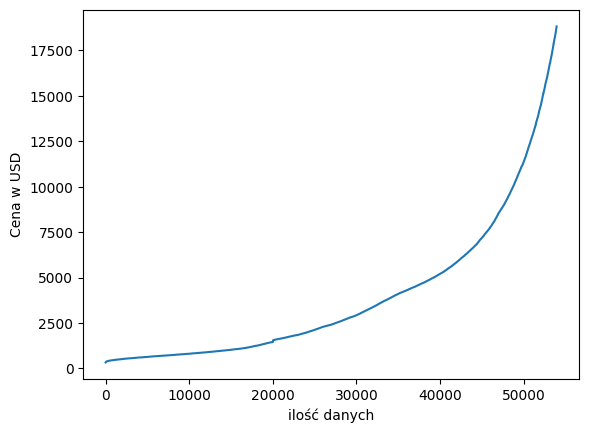

In [3]:
price = df.loc[:, 'price']
x = np.linspace(0,53940,53940)
plt.plot(x, sorted(price))
plt.xlabel('ilość danych')
plt.ylabel('Cena w USD')
plt.show()

### 2.1 Podstawowe statystyki

##### 2.1.1 Miary położenia

Miary położenia określają wokół jakich wartości skupia się rozkład analizowanych danych. Poniżej możemy zobaczyć najważniejsze z nich:

- Minimalna cena diamentu w opracowywanych danych to 326 USD

- Maksymalna cena diamentu w opracowywanych danych to 18823 USD

- Rozstęp ceny diamentów wynosi 18497 USD 

- Średnia arytmetyczna cen diamentów wynosi 3932.80 USD

- Średnia harmoniczna cen diamentów wynosi 1524.87 USD

- Średnia geometryczna cen diamentów wynosi 2408.52 USD

- Średnia ucinana dla 5% obciętych wartości wynosi 3677.92 USD

- Średnia ucinana dla 10% obciętych wartości wynosi 3470.83 USD

- Średnia ucinana dla 15% obciętych wartości wynosi 3301.13 USD

- Średnia ucinana dla 20% obciętych wartości wynosi 3158.98 USD

- Średnia winsorowska dla 5% obciętych wartości wynosi 3896.37 USD

- Średnia winsorowska dla 10% obciętych wartości wynosi 3806.30 USD

- Średnia winsorowska dla 15% obciętych wartości wynosi 3692.87 USD

- Średnia winsorowska dla 20% obciętych wartości wynosi 3573.89 USD

- Mediana cen diamentów wynosi 2401.00 USD

- Kwartyle cen diamentów wynoszą odpowiednio 950.00 USD dla Q1 oraz 5324.25 USD dla Q3.

Znacząca różnica między średnią arytmetyczną a średnimi ucinanymi wskazuje na duży rozrzut oraz występowanie wartości skrajnych. Podobnie świadczyć o tym może różnica między wcześniej wspomnianą średnią a medianą. Widać, że duża część wartości znajduje się do trzeciego kwartyla a następnie zaczynają znacznie rozbiegać co pokazują później przedstawione histogram oraz boxplot. 

Zostały one obliczone w następujący sposób:

In [9]:
#minimum
minimum = price.min()
#maksimum
maximum = price.max()
#rozstęp
roz = maximum - minimum
#średnia arytmetyczna
arithmetic_mean = price.mean()
#średnia harmoniczna
harmonic_mean = len(price)/(sum([1/i for i in price]))
#średnia geometryczna
geometric_mean = gmean(price)
#średnia ucinana dla 5%, 10%, 15%, 20% obciętych danych
perc = [int(len(price)*k) for k in [0.025,0.05,0.075,0.10]]
truncated_means = [sum(sorted(price)[k+1:-k])/(len(price) - 2*k) for k in perc] 
#średnia winsorowska 
win = [0.025,0.05,0.075,0.10]
winsorized_means = [np.mean(winsorize(price, [k,k])) for k in win]
#mediana
median = price.median()
#kwartyle
q1 = price.quantile(0.25)
q3 = price.quantile(0.75)

##### 2.1.2 Miary rozproszenia, asymetrii oraz spłaszczenia

Miary te wskazują stopień zmienności badanych danych. Poniżej możemy zobaczyć ich wartości:

- Rozstęp międzykwartylowy dla cen diamentów wynosi 4374.25 USD

- Odchylenie standardowe cen diamentów wynosi 3989.44 USD

- Współczynnik zmienności cen diamentów wynosi 101.44%

- Współczynnik skośności cen diamentów wynosi 1.62

- Kurtoza cen diamentów wynosi 5.18.

Współczynnik zmienności zwykle wynosi od 15% do 25%. Współczynnik zmienności mówi nam o asymetryczności danych. Dla standardowego rozkładu normalnego wynosi on 0, gdy jego wartość spada poniżej 0 mówimy o lewostronnej skośności, w drugim przypadku mówimy o skośności prawostronnej. Kurtoza za to mówi o stosunku intensywności wartości skrajnych do intensywności wartości skrajnych rozkładu. Dla standardowego rozkładu normalnego wynosi ona 3. Rozkłady lekkoogonowe przyjmują wartości poniżej 3, a rozkłady ciężkoogonowe wartości powyżej 3. Z naszych wartości widać, że nie możemy dopasować naszych danych do rozkładu normalnego. Z przedstawionych miar możemy wyciągnąć podobne wnioski jak poprzednio. Potwierdza to test statystyczny Kołmogorowa-Smirnowa, który zwraca pvalue równą 0.0. Jest to wartość poniżej poziomu 0.05, więc odrzucamy hipotezę zerową.

Poniżej możemy zobaczyć sposób obliczenia tych wartości:

In [21]:
#rozstęp międzykwartylowy
iqr = q3-q1
#odchylenie standardowe
std = price.std()
#współczynnik zmienności
coef_of_var = std/arithmetic_mean * 100
#współczynnik skośności
skewness = scipy.stats.skew(price)
#kurtoza
kurtosis = scipy.stats.kurtosis(price, fisher=False)
#kstest
ks_test = scipy.stats.kstest(price, 'norm')

### 2.3 Wizualizacja danych
##### 2.3.1 Histogram

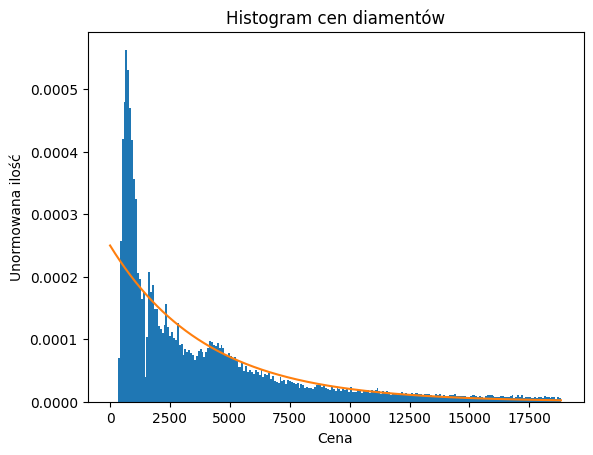

In [15]:
x_axis = np.arange(0, 18823, 1)
plt.hist(price, bins='sqrt', density=True)
plt.plot(x_axis, scipy.stats.expon.pdf(x_axis, scale=4000))
plt.title('Histogram cen diamentów')
plt.xlabel('Cena')
plt.ylabel('Unormowana ilość')
plt.show()

##### 2.3.2 Boxplot

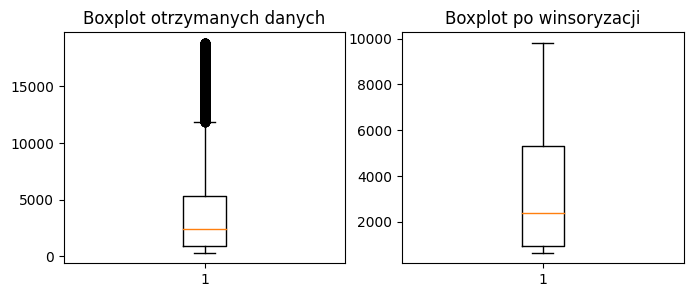

In [9]:
winsor = winsorize(price, [0.1, 0.1])
fig, ax = plt.subplots(1, 2, figsize = (8,3))
ax[0].boxplot(price)
ax[0].set_title('Boxplot otrzymanych danych')
ax[1].boxplot(winsor)
ax[1].set_title('Boxplot po winsoryzacji')
plt.show()

##### 2.3.3 Dystrybuanta empiryczna

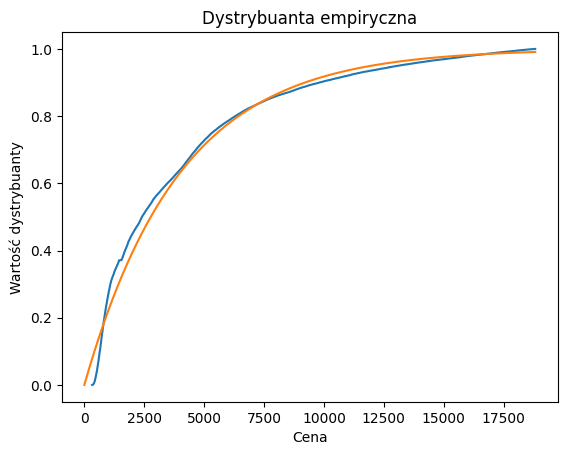

In [29]:
x_axis = np.arange(0, 18823, 1)
ecdf = ECDF(price)
plt.plot(ecdf.x, ecdf.y)
plt.plot(x_axis, scipy.stats.expon.cdf(x_axis, scale=4000))
plt.title('Dystrybuanta empiryczna')
plt.xlabel('Cena')
plt.ylabel('Wartość dystrybuanty')
plt.show()

Analizowane dane trudno dopasować do jakiegokolwiek rozkładu. Na wykresach w sekcji 2.3.1. oraz 2.3.2 możemy zobaczyć pórownanie histogramu danych do gęstości teoretycznej rozkładu $Exp(4000)$ oraz dystrybuanty empirycznej do dystrybuanty teoretycznej. Możemy zauważyć podobieństwo, jednak wartości są zaburzane przez wartości skrajne co potwierdza kurtoza naszych danych. Widać to także na porównaniu boxplotów po oraz przed winsoryzacją danych.

## 3. Waga diamentów

Następnie w podobny sposób przeanalizowaliśmy dane dotyczące wagi diamentów. Poniżej możemy zobaczyć przedstawienie posortowanych wag w kolejności rosnącej:

In [7]:
df = pd.read_csv('diamonds.csv')

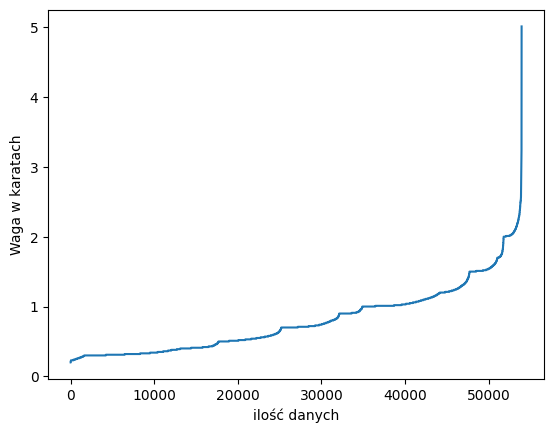

In [28]:
carat = df.loc[:, 'carat']
x = np.linspace(0,53940,53940)
plt.plot(x, sorted(carat))
plt.xlabel('ilość danych')
plt.ylabel('Waga w karatach')
plt.show()

### 3.1 Podstawowe statystyki

##### 3.1.1 Miary położenia

Poniżej najważniejsze z miar położenia oraz sposób ich obliczenia:

- Minimalna waga diamentu w opracowywanych danych to 0.2 karata

- Maksymalna waga diamentu w opracowywanych danych to 5.01 karata

- Rozstęp wag diamentów wynosi 4.81 karata

- Średnia arytmetyczna wag diamentów wynosi 0.80 karata

- Średnia harmoniczna wag diamentów wynosi 0.57 karata

- Średnia geometryczna wag diamentów wynosi 0.67 karata

- Średnia ucinana dla 5% obciętych wartości wynosi 0.78 karata

- Średnia ucinana dla 10% obciętych wartości wynosi 0.76 karata

- Średnia ucinana dla 15% obciętych wartości wynosi 0.75 karata

- Średnia ucinana dla 20% obciętych wartości wynosi 0.73 karata

- Średnia winsorowska dla 5% obciętych wartości wynosi 0.79 karata

- Średnia winsorowska dla 10% obciętych wartości wynosi 0.78 karata

- Średnia winsorowska dla 15% obciętych wartości wynosi 0.77 karata

- Średnia winsorowska dla 20% obciętych wartości wynosi 0.77 karata

- Mediana wag diamentów wynosi 0.70 karata

- Kwartyle wag diamentów wynoszą odpowiednio 0.40 karata dla Q1 oraz 1.04 karata dla Q3.

Wartości podobnie jak dla cen diamentów występuje wiele wartości skrajnych, co w dużym stopniu zaburza wartości miar położenia.

In [12]:
#minimum
minimum = carat.min()
#maksimum
maximum = carat.max()
#rozstęp
roz = maximum - minimum
#średnia arytmetyczna
arithmetic_mean = carat.mean()
#średnia harmoniczna
harmonic_mean = len(carat)/(sum([1/i for i in carat]))
#średnia geometryczna
geometric_mean = gmean(carat)
#średnia ucinana dla 5%, 10%, 15%, 20% obciętych danych
perc = [int(len(carat)*k) for k in [0.025,0.05,0.075,0.10]]
truncated_means = [sum(sorted(carat)[k+1:-k])/(len(carat) - 2*k) for k in perc] 
#średnia winsorowska 
win = [0.025,0.05,0.075,0.10]
winsorized_means = [np.mean(winsorize(carat, [k,k])) for k in win]
#mediana
median = carat.median()
#kwartyle
q1 = carat.quantile(0.25)
q3 = carat.quantile(0.75)

##### 3.1.2 Miary rozproszenia, asymetrii oraz spłaszczenia

Wartości podstawowych miar rozproszenia, asymetrii, spłaszczenia oraz sposób ich obliczenia:

- Rozstęp międzykwartylowy dla wag diamentów wynosi 0.64 karata

- Odchylenie standardowe wag diamentów wynosi 0.47 karata

- Współczynnik zmienności wag diamentów wynosi 59.40%

- Współczynnik skośności wag diamentów wynosi 1.12

- Kurtoza wag diamentów wynosi 4.26

Wartości analizowanych miar ponownie wskazują na rozbieżność analizowanych danych z rozkładem normalnym. Potwierdza to test statystyczny Kołmogorowa-Smirnowa, który zwraca pvalue równą 0.0. Jest to wartość poniżej poziomu 0.05, więc odrzucamy hipotezę zerową.

In [25]:
#rozstęp międzykwartylowy
iqr = q3-q1
#odchylenie standardowe
std = carat.std()
#współczynnik zmienności
coef_of_var = std/arithmetic_mean * 100
#współczynnik skośności
skewness = scipy.stats.skew(carat)
#kurtoza
kurtosis = scipy.stats.kurtosis(carat, fisher=False)
#kstest
ks_test = scipy.stats.kstest(carat, 'norm')

### 3.3 Wizualizacja danych
##### 3.3.1 Histogram

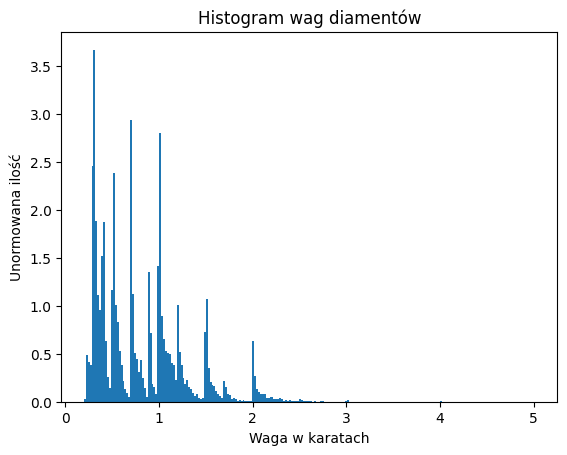

In [26]:
x_axis = np.arange(0, 18823, 1)
plt.hist(carat, bins='sqrt', density=True)
plt.title('Histogram wag diamentów')
plt.xlabel('Waga w karatach')
plt.ylabel('Unormowana ilość')
plt.show()

##### 3.3.2 Boxplot

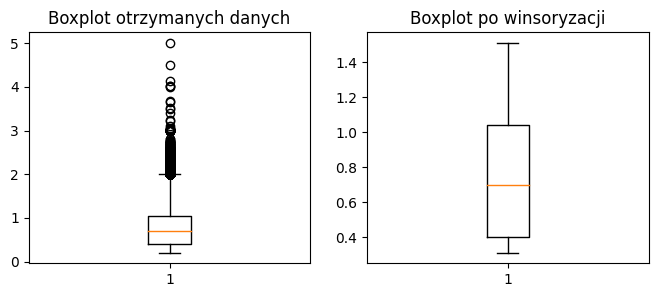

In [18]:
winsor = winsorize(carat, [0.1, 0.1])
fig, ax = plt.subplots(1, 2, figsize = (8,3))
ax[0].boxplot(carat)
ax[0].set_title('Boxplot otrzymanych danych')
ax[1].boxplot(winsor)
ax[1].set_title('Boxplot po winsoryzacji')
plt.show()

##### 3.3.3 Dystrybuanta empiryczna

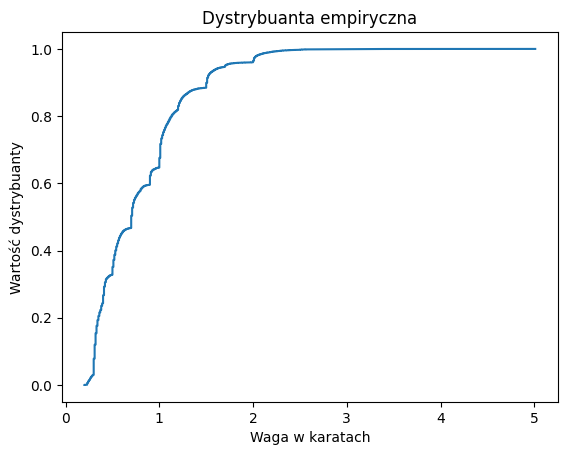

In [27]:
x_axis = np.arange(0, 18823, 1)
ecdf = ECDF(carat)
plt.plot(ecdf.x, ecdf.y)
plt.title('Dystrybuanta empiryczna')
plt.xlabel('Waga w karatach')
plt.ylabel('Wartość dystrybuanty')
plt.show()

Dane dotyczące wagi diamentów jeszcze trudniej dopasować do danego rozkładu. Widać duże podobieństwo między danymi związanami z wagą i ceną diamentów, co nie powinno dziwić. Jednak dla danych dotyczących wagi diamentów widać duże skoki w wartościach okrągłych, czego nie widać tak przy cenach diamentów.